<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/Tarea_SVM_Clases_No_Balanceadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Tarea: Clasificación con SVM en un contexto de Clases No Balanceadas

**Nivel:** Maestría  
**Duración estimada:** 2-3 horas  
**Herramientas:** Python, Scikit-Learn, imbalanced-learn, Matplotlib, Google Colab  
**Temas clave:**  
- Clasificación con SVM  
- Clases no balanceadas  
- Validación cruzada estratificada  
- Métricas adaptadas a desbalance  
- SMOTE y otras técnicas de remuestreo


## 🧾 Objetivos de aprendizaje

Al finalizar esta tarea, el estudiante será capaz de:

- Identificar los efectos del desbalance de clases en modelos clasificadores.
- Implementar una SVM en un escenario multiclase o binario con fuerte desbalance.
- Evaluar el rendimiento del modelo usando métricas robustas como recall, F1, y G-mean.
- Aplicar técnicas como SMOTE y comparar su impacto.
- Utilizar `StratifiedKFold` para asegurar la adecuada evaluación del modelo.


## 🔧 Instrucciones

1. **Carga y exploración del dataset**
   - Utiliza el dataset `breast_cancer` o `wine` de Scikit-Learn.
   - Verifica la distribución de clases.
   - Visualiza con un gráfico la distribución y las principales características.

2. **Entrenamiento base con SVM**
   - Usa un modelo SVM con kernel RBF.
   - Aplica `StratifiedKFold` con 5 particiones.
   - Evalúa con métricas por clase: precisión, recall, F1-score.
   - Calcula y reporta métricas promedio y por clase.

3. **Análisis del problema de desbalance**
   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?
   - Reporta matriz de confusión promedio.

4. **Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.

5. **Visualización y conclusiones**
   - Usa un gráfico de barras comparando F1 por clase antes y después.
   - Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
   - Explica cuándo conviene usar otras técnicas como `One-Sided Selection` o `ADASYN`.


## 📁 Entregables

- Google Colab Notebook con:
  - Código bien comentado
  - Gráficas solicitadas
  - Conclusiones reflexivas al final
- Exportación del notebook a PDF


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.datasets import load_breast_cancer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, precision_recall_fscore_support
pd.set_option('display.max_columns', 50)

## Carga y Exploración

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

No existen valores nulos y todas las variables son numéricas

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
cols_num = (df.drop(columns='target')).columns.tolist()

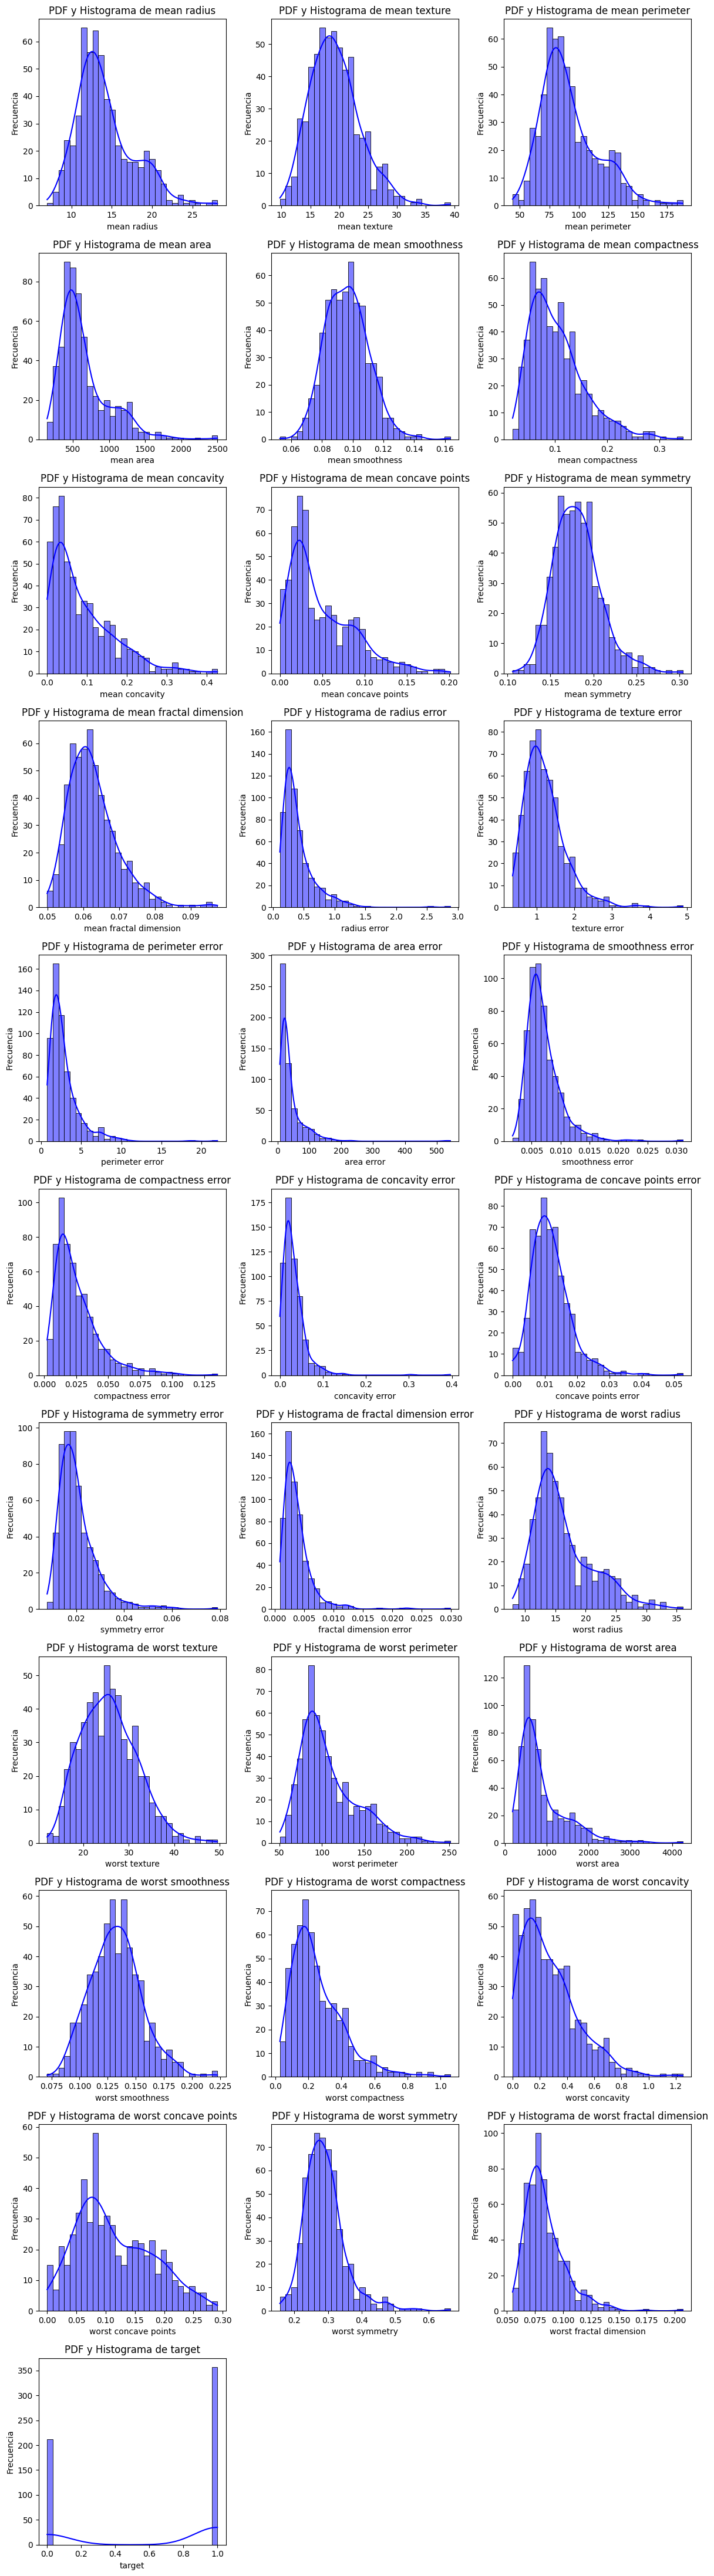

In [7]:
columns = df.columns
n = len(columns)
rows = math.ceil(n / 3)  # 3 columnas por fila
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 4*rows))
for i, col in enumerate(columns, 1):
    plt.subplot(rows, 3, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
df['target'].value_counts()

,count
target,
1,357
0,212


In [9]:
df['target'].value_counts(1)

,proportion
target,
1,0.627417
0,0.372583


Se obseva que tenemos clases desbalanceadas, pero la diferencia no es tan desproporcionada, por lo que de inicio, es posible trabajar de esta forma

## Entrenamiento base con SVM

In [10]:
X = df.drop(columns='target')
y = df['target']

In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
# Listas para guardar resultados
conf_matrices = []
precision_scores, recall_scores, f1_scores = [], [], []

In [14]:
# Validación cruzada para obtener métricas por clase
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)

    # Métricas por clase
    report = precision_recall_fscore_support(y_test, y_pred, average=None, zero_division=0)
    precision_scores.append(report[0])
    recall_scores.append(report[1])
    f1_scores.append(report[2])

## Métricas

In [15]:
# Convertir a arrays
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
f1_scores = np.array(f1_scores)

In [16]:
for i in range(len(np.unique(y))):
    print(f"Clase {i}:")
    print(f"  Precisión promedio: {precision_scores[:, i].mean():.3f}")
    print(f"  Recall promedio:    {recall_scores[:, i].mean():.3f}")
    print(f"  F1 promedio:         {f1_scores[:, i].mean():.3f}")

Clase 0:
  Precisión promedio: 0.981
  Recall promedio:    0.958
  F1 promedio:         0.969
Clase 1:
  Precisión promedio: 0.976
  Recall promedio:    0.989
  F1 promedio:         0.982


Las métricas son muy buenas para ambas clases, por lo que es muy probable que tengamos un modelo sobreajustado

In [17]:
avg_conf_matrix = np.mean(conf_matrices, axis=0)

In [18]:
print(np.round(avg_conf_matrix, 2))

[[40.6  1.8]
 [ 0.8 70.6]]


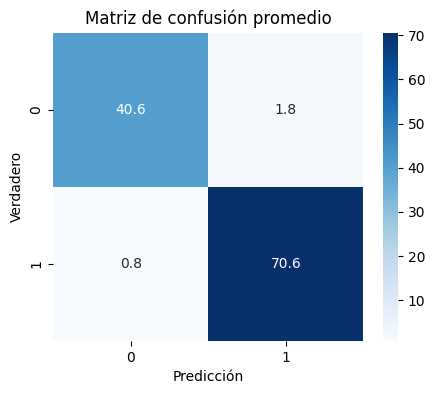

In [19]:
# Visualizar matriz promedio
plt.figure(figsize=(5,4))
sns.heatmap(avg_conf_matrix, annot=True, fmt=".1f", cmap="Blues")
plt.title("Matriz de confusión promedio")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

Vemos que los errores dada la matriz de confusión son muy pequeños para ambas clases, por lo que se refuerza la teoría de un posible sobreajuste del modelo

## SMOTE

In [20]:
# Listas para guardar resultados
conf_matrices_1 = []
precision_scores_1, recall_scores_1, f1_scores_1 = [], [], []

In [21]:
# Validación cruzada para obtener métricas por clase
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices_1.append(cm)

    # Métricas por clase
    report = precision_recall_fscore_support(y_test, y_pred, average=None, zero_division=0)
    precision_scores_1.append(report[0])
    recall_scores_1.append(report[1])
    f1_scores_1.append(report[2])

In [22]:
# Convertir a arrays
precision_scores_1 = np.array(precision_scores_1)
recall_scores_1 = np.array(recall_scores_1)
f1_scores_1 = np.array(f1_scores_1)

In [23]:
for i in range(len(np.unique(y))):
    print(f"Clase {i}:")
    print(f"  Precisión promedio: {precision_scores_1[:, i].mean():.3f}")
    print(f"  Recall promedio:    {recall_scores_1[:, i].mean():.3f}")
    print(f"  F1 promedio:         {f1_scores_1[:, i].mean():.3f}")

Clase 0:
  Precisión promedio: 0.963
  Recall promedio:    0.958
  F1 promedio:         0.960
Clase 1:
  Precisión promedio: 0.975
  Recall promedio:    0.978
  F1 promedio:         0.976


In [24]:
avg_conf_matrix = np.mean(conf_matrices_1, axis=0)

In [25]:
print(np.round(avg_conf_matrix, 2))

[[40.6  1.8]
 [ 1.6 69.8]]


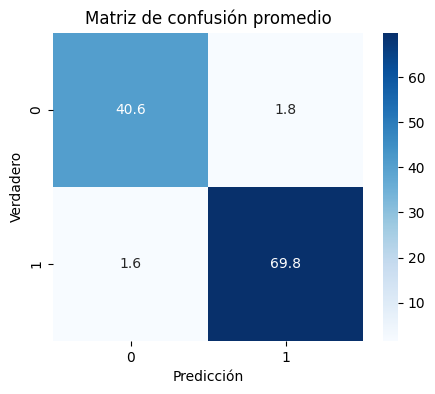

In [26]:
# Visualizar matriz promedio
plt.figure(figsize=(5,4))
sns.heatmap(avg_conf_matrix, annot=True, fmt=".1f", cmap="Blues")
plt.title("Matriz de confusión promedio")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

Los resultados son muy similares, de hecho, para efectos prácticos, la diferencia es insignificante, por lo que no vale la pena aplicar SMOTE, ya que no añade valor al modelo, pues se obtienen los mismos resultados con las clases desbalanceadas

In [27]:
clases = [0, 1]
resumen = pd.DataFrame({
    'Clase': clases,
    'Precisión (sin SMOTE)': np.round(precision_scores.mean(), 3),
    'Precisión (con SMOTE)': np.round(precision_scores_1.mean(), 3),
    'Recall (sin SMOTE)': np.round(recall_scores.mean(), 3),
    'Recall (con SMOTE)': np.round(recall_scores_1.mean(), 3),
    'F1 (sin SMOTE)': np.round(f1_scores.mean(), 3),
    'F1 (con SMOTE)': np.round(f1_scores_1.mean(), 3)
})
print("=== Comparación de métricas promedio por clase ===")
resumen

=== Comparación de métricas promedio por clase ===


,Clase,Precisión (sin SMOTE),Precisión (con SMOTE),Recall (sin SMOTE),Recall (con SMOTE),F1 (sin SMOTE),F1 (con SMOTE)
0,0,0.978,0.969,0.973,0.968,0.975,0.968
1,1,0.978,0.969,0.973,0.968,0.975,0.968


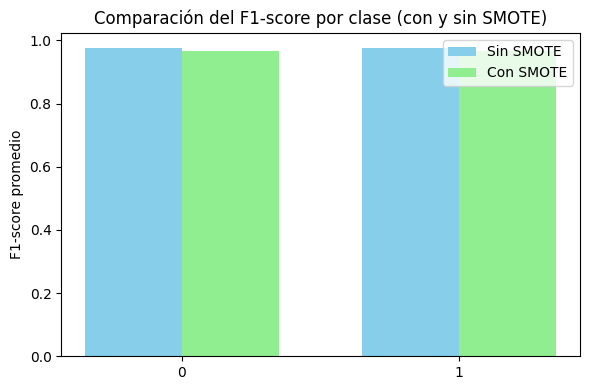

In [28]:
# === 5️⃣ Gráfico comparativo de F1 por clase ===
plt.figure(figsize=(6,4))
x = np.arange(len(clases))
width = 0.35

plt.bar(x - width/2, f1_scores.mean(), width, label='Sin SMOTE', color='skyblue')
plt.bar(x + width/2, f1_scores_1.mean(), width, label='Con SMOTE', color='lightgreen')

plt.xticks(x, clases)
plt.ylabel('F1-score promedio')
plt.title('Comparación del F1-score por clase (con y sin SMOTE)')
plt.legend()
plt.tight_layout()
plt.show()


Como se sabe el SMOTE sirve para balancear clases, es decir, cuando existenn más observaciones de una clase que de la otra, esto tiene implicaciones importantes en el modelo SVM, ya que al generar observaciones sintéticas podríamos mover los límtes para la generación del hiperplano, adicional el propio método por si mismo podría generar sobreajuste.

One Sided Selection es más eficiente cuando la clase mayoritaria es mucho mayor en proporción y existan observaciones que generen ruido, por ejemplo outliers o duplicados, por otro lado, ADASYN es más conveniente cuando la clase minoritaria esta muy dispersa entre sí y no es posible agruparla de manera aislada en ciertas regiones del espacio, ya que este método genera las observaciones cerca de la frontera de decisión, haciendo más evidente la segmentación.

En este caso, los modelos generados con y sin SMOTE muestran resultados casi identicos y muy cercano a 1, por lo que al porbar con nuevas observaciones que el modelo no haya visto es probable que no sea capaz de generalizar muy bien, ya que los modelos tienen indicios de sobreajuste.